# Machine Learning: Comparison of Multiple Classification Methods

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

In [140]:
student_name = 'Juha-Matti Hellsten'

## Data preprocessing

Familiarize yourself with the data and
implement data preprocessing.

In [141]:
# TODO: Preprocessing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/voice.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print(df.head())

print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (3168, 21)

Columns: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.9

## Training and test data

Let's split the data into training and test sets and scale the numerical data.

In [142]:
# TODO: Splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building models

### Decision Tree

In [146]:
# TODO: Decision Tree classification implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred))

score = dt.score(X_test_scaled, y_test)
print(f"Decision Tree accuracy: {score:.2f}")

Decision Tree Results:
              precision    recall  f1-score   support

      female       0.95      0.98      0.97       297
        male       0.98      0.95      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Decision Tree accuracy: 0.97


In [147]:
# TODO: Feature importances in Decision Tree classification

importance = pd.DataFrame({
   'feature': X.columns,
   'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 5 most important features:")
print(importance.head(5))

Top 5 most important features:
    feature  importance
12  meanfun    0.863249
5       IQR    0.046840
13   minfun    0.024798
9       sfm    0.020919
6      skew    0.006330


### Support Vector Machine

In [148]:
# TODO: SVC classification implementation
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
y_pred_proba = svm.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

score = svm.score(X_test_scaled, y_test)
print(f"SVM accuracy: {score:.2f}")


Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       297
        male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

SVM accuracy: 0.98


### kNN

In [153]:
# TODO: kNN classification implementation
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

score = knn.score(X_test_scaled, y_test)
print(f"KNN (k=7) accuracy: {score:.2f}")


Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.98      0.98       297
        male       0.98      0.99      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

KNN (k=7) accuracy: 0.98


### Naive Bayes

In [154]:
# TODO: Naive Bayes classification implementation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)
y_pred_proba = nb.predict_proba(X_test_scaled)

y_test_bin = label_binarize(y_test, classes=['female', 'male'])

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

print("Classification Report:")
print(classification_report(y_test, y_pred))

score = nb.score(X_test_scaled, y_test)
print(f"Gaussian Naive Bayes accuracy: {score:.2f}")

Classification Report:
              precision    recall  f1-score   support

      female       0.90      0.91      0.90       297
        male       0.92      0.91      0.91       337

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

Gaussian Naive Bayes accuracy: 0.91


### Random Forest

In [155]:
# TODO: Random Forest classification implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Random Forest Results:")
print(classification_report(y_test, y_pred))

Random Forest Results:
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       297
        male       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

In [156]:
# TODO: PCA + selected Classifier
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca_reduced = pca.fit_transform(X_train_scaled)
X_test_pca_reduced = pca.transform(X_test_scaled)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca_reduced, y_train)

y_pred = rf.predict(X_test_pca_reduced)

print("\nResults for Random Forest with PCA:")
print(classification_report(y_test, y_pred))

Number of components needed for 95% variance: 10

Results for Random Forest with PCA:
              precision    recall  f1-score   support

      female       0.96      0.98      0.97       297
        male       0.98      0.97      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



### Visualization

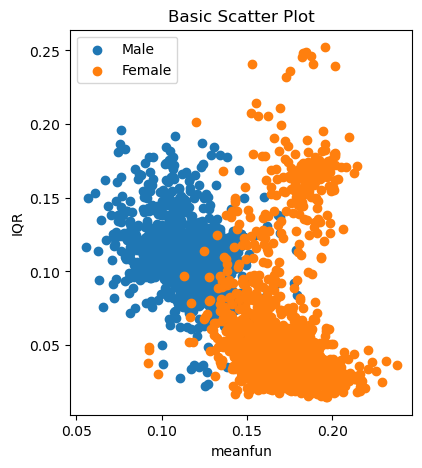

In [157]:
# TODO: Draw figure

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importance = pd.DataFrame({
   'feature': X.columns,
   'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

top_2_features = importance['feature'].head(2).tolist()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df[df['label'] == 'male'][top_2_features[0]], 
          df[df['label'] == 'male'][top_2_features[1]], 
          label='Male')
plt.scatter(df[df['label'] == 'female'][top_2_features[0]], 
          df[df['label'] == 'female'][top_2_features[1]], 
          label='Female')
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title('Basic Scatter Plot')
plt.legend()

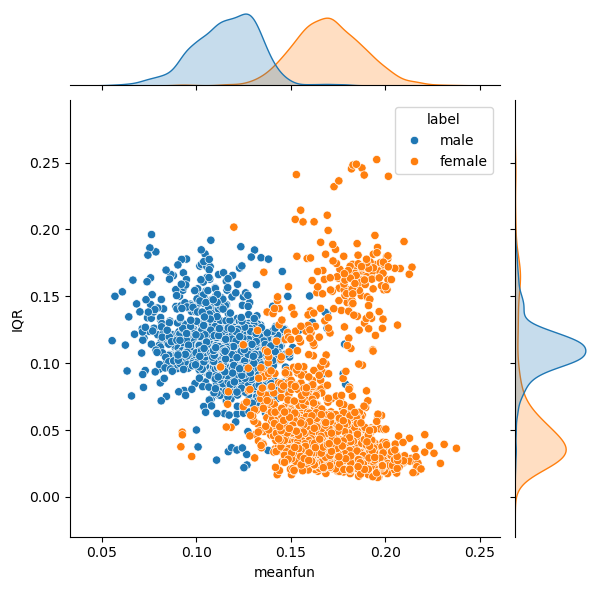

In [158]:
sns.jointplot(data=df, x=top_2_features[0], y=top_2_features[1], 
            hue='label', kind='scatter')
plt.show()

## Analyzing and processing the results

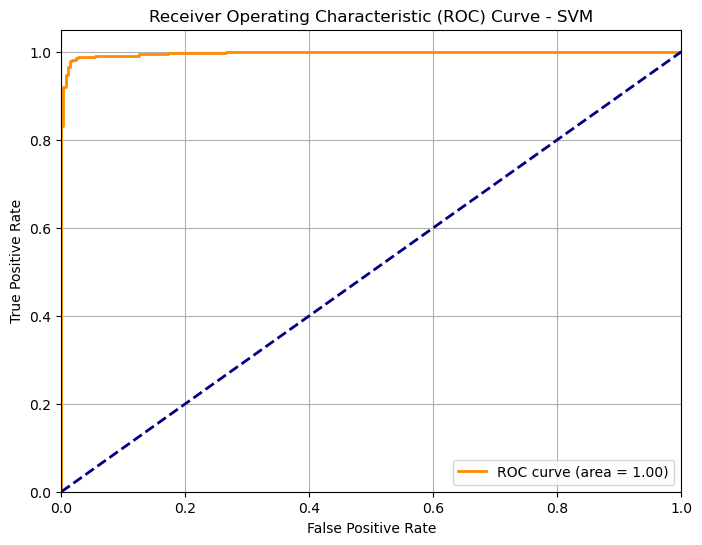

SVM ROC AUC: 0.997


In [162]:
# TODO: ROC curve with SVM

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_proba = svm.predict_proba(X_test_scaled)

y_test_bin = label_binarize(y_test, classes=['female', 'male'])

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"SVM ROC AUC: {roc_auc:.3f}")

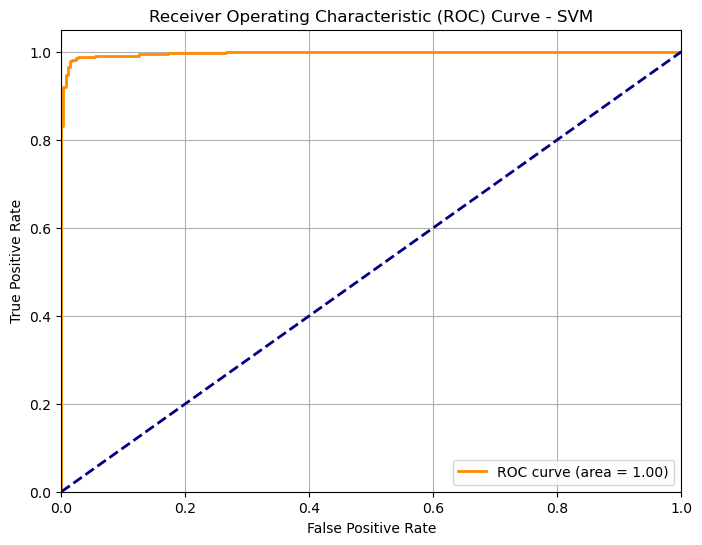

kNN ROC AUC: 0.997


In [164]:
# TODO: ROC curve with kNN method

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_proba = svm.predict_proba(X_test_scaled)

y_test_bin = label_binarize(y_test, classes=['female', 'male'])

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"kNN ROC AUC: {roc_auc:.3f}")

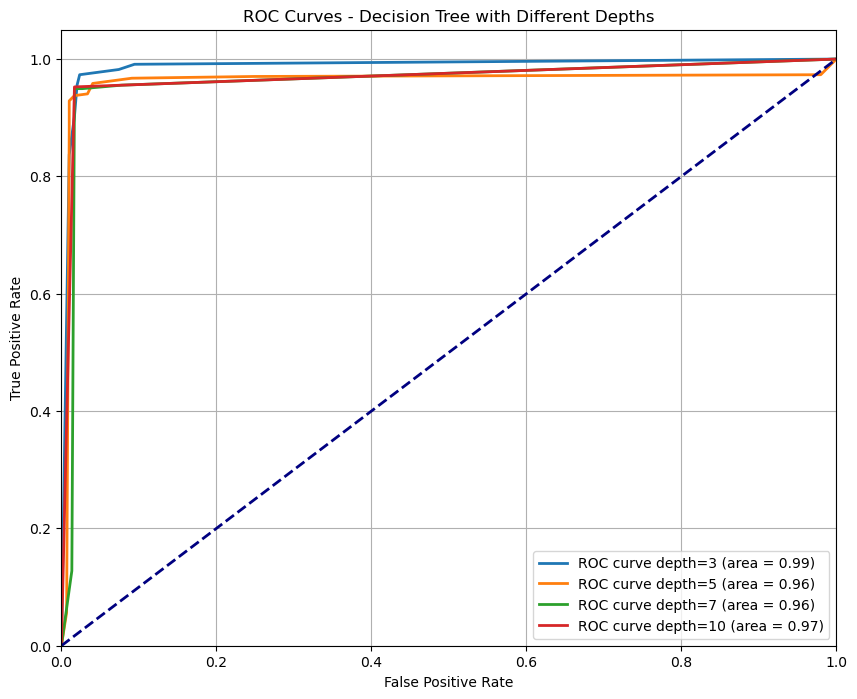

Accuracy with depth=3: 0.975
Accuracy with depth=5: 0.959
Accuracy with depth=7: 0.965
Accuracy with depth=10: 0.967


In [165]:
# TODO: ROC curve with decision tree method

depths = [3, 5, 7, 10]
plt.figure(figsize=(10, 8))

for depth in depths:
   dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
   dt.fit(X_train_scaled, y_train)
   
   y_pred_proba = dt.predict_proba(X_test_scaled)
   
   y_test_bin = label_binarize(y_test, classes=['female', 'male'])
   
   fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
   roc_auc = auc(fpr, tpr)
   
   plt.plot(fpr, tpr, lw=2, 
            label=f'ROC curve depth={depth} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Decision Tree with Different Depths')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

for depth in depths:
   dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
   dt.fit(X_train_scaled, y_train)
   score = dt.score(X_test_scaled, y_test)
   print(f"Accuracy with depth={depth}: {score:.3f}")

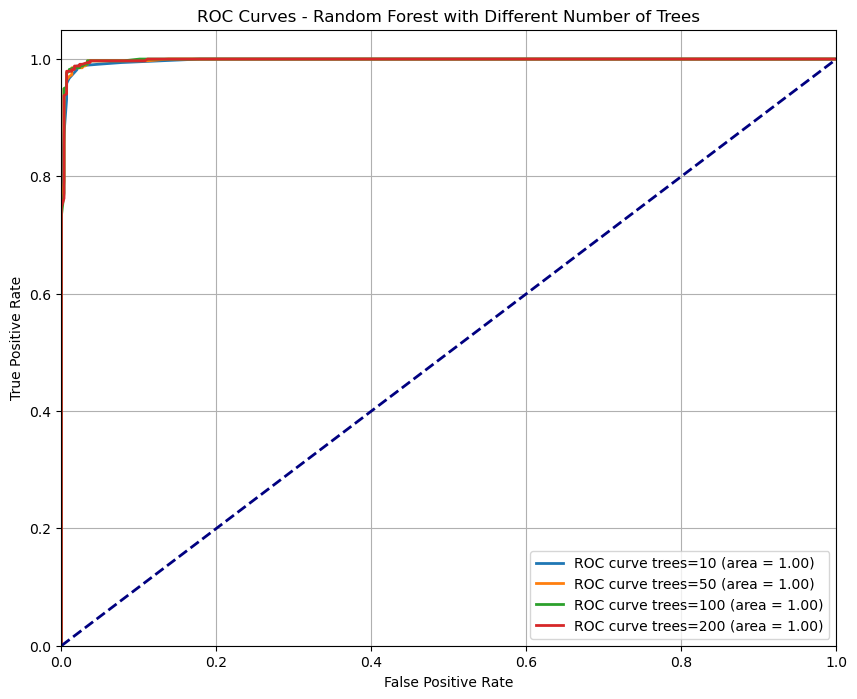

Accuracy with 10 trees: 0.978
Accuracy with 50 trees: 0.979
Accuracy with 100 trees: 0.984
Accuracy with 200 trees: 0.984

Top 5 most important features:
    feature  importance
12  meanfun    0.354057
5       IQR    0.218165
3       Q25    0.136403
1        sd    0.070189
8    sp.ent    0.037931


In [166]:
# TODO: ROC curve with random forest method

n_trees = [10, 50, 100, 200]
plt.figure(figsize=(10, 8))

for n_tree in n_trees:
   rf = RandomForestClassifier(n_estimators=n_tree, random_state=42)
   rf.fit(X_train_scaled, y_train)
   
   y_pred_proba = rf.predict_proba(X_test_scaled)
   
   y_test_bin = label_binarize(y_test, classes=['female', 'male'])
   
   fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
   roc_auc = auc(fpr, tpr)
  
   plt.plot(fpr, tpr, lw=2, 
            label=f'ROC curve trees={n_tree} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest with Different Number of Trees')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

for n_tree in n_trees:
   rf = RandomForestClassifier(n_estimators=n_tree, random_state=42)
   rf.fit(X_train_scaled, y_train)
   score = rf.score(X_test_scaled, y_test)
   print(f"Accuracy with {n_tree} trees: {score:.3f}")

importance = pd.DataFrame({
   'feature': X.columns,
   'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 most important features:")
print(importance.head())

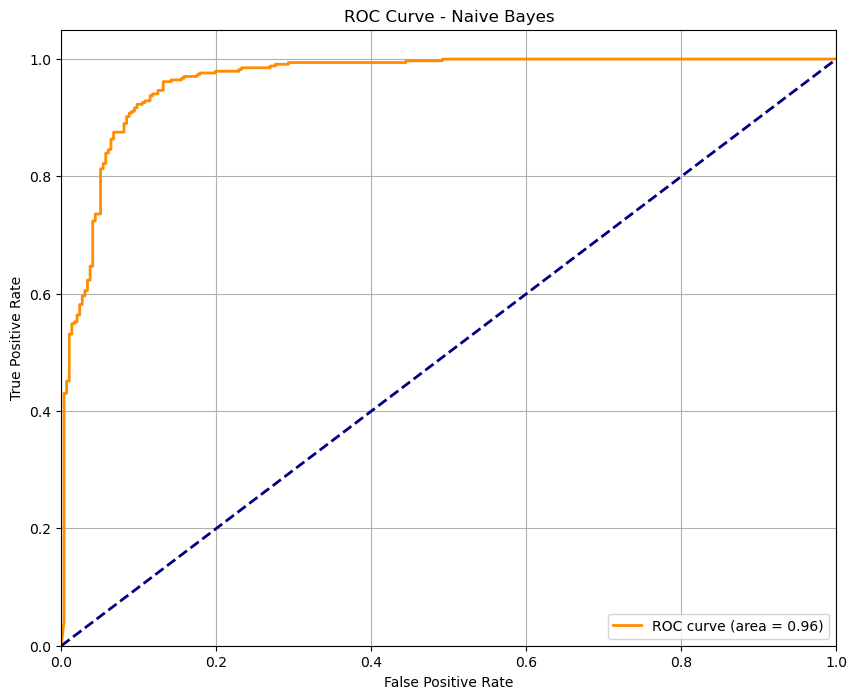

Naive Bayes accuracy: 0.909


In [167]:
# TODO: ROC curve with Bayes method
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_proba = nb.predict_proba(X_test_scaled)

y_test_bin = label_binarize(y_test, classes=['female', 'male'])

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

score = nb.score(X_test_scaled, y_test)
print(f"Naive Bayes accuracy: {score:.3f}")

### Comparison of Different Classification Models

Random Forest performed the best in this task. It had the highest accuracy, the best precision and the best ROC AUC. Random Forest did exceptionally well in avoiding false positives. SVM was nearly as good as Random Forest. It had balanced results in every metric and a slighty better recall than Randon Forest. KNN did well with a good accuracy and it had the most balanced results in each metric. Decision Tree had average results in accuracy and good results in precision. It had a slightly weaker recall and clearly weaker ROC AUC. Naive Bayes was clearly the worst method in this case, its accuracy was the weakest. However, its ROC AUC was surprisingly reasonable.

In conclusion, Random Forest was the best model, but SVM was very close. Naive Bayes was by far the weakest. However, all models had an accuracy over 0.90, which implies that classification task was relatively straightforward.

Other classification methods to apply with this dataset would include gradient boosting methods, neural networks, ensemble methods, logistic regression  and QDA.